In [13]:
require('cowplot')
library('ggplot2')
source('get_expected_pval_and_equiv_z.R')
source('multiplot.R')
source('plot_lib.R')
theme_set(theme_gray()) # switch to default ggplot2 theme for good

In [14]:
allsimudat_k25_n50 <- load_data_from_csv('^test1_k025_n50_btw1_.*')
allsimudat_k25_n20 <- load_data_from_csv('^test1_k025_btw1_.*')
allsimudat_k50_n20 <- load_data_from_csv('^test1_k050_btw1_.*')
allsimudat_k100_n100 <- load_data_from_csv('^test1_k100_n100_btw1_.*')

In [15]:
allsimudat <- rbind(allsimudat_k25_n50, allsimudat_k25_n20, allsimudat_k50_n20, allsimudat_k100_n100)

In [16]:
allsimudat$withinInfo <- allsimudat$Within/allsimudat$nSubjects
allsimudat$withinInfo[allsimudat$WithinSame==FALSE] <- "varying"
allsimudat$withinInfo <- factor(allsimudat$withinInfo)

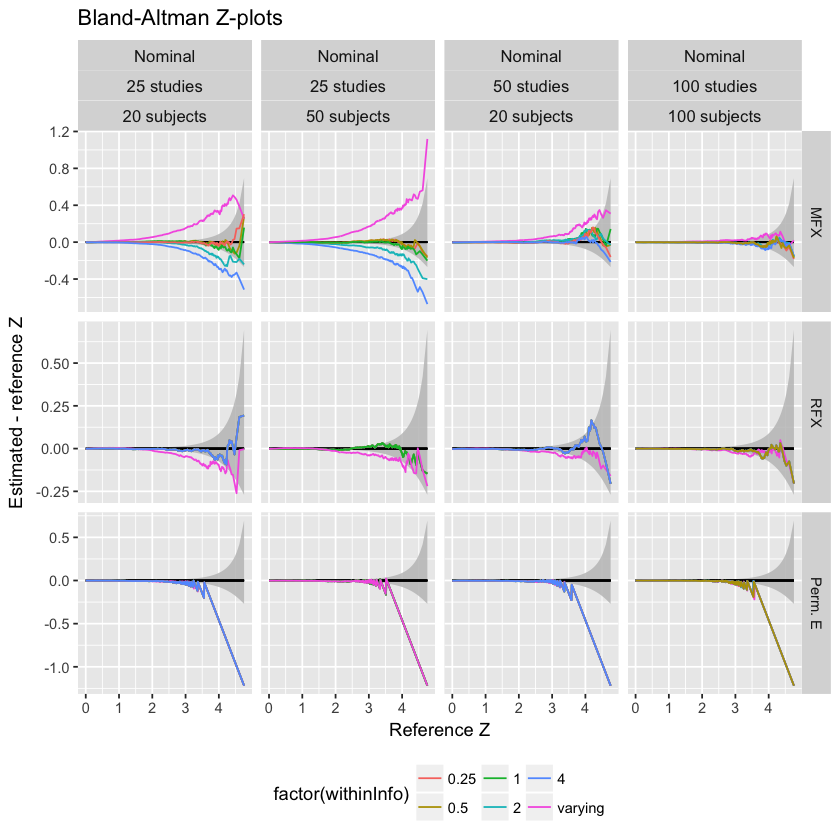

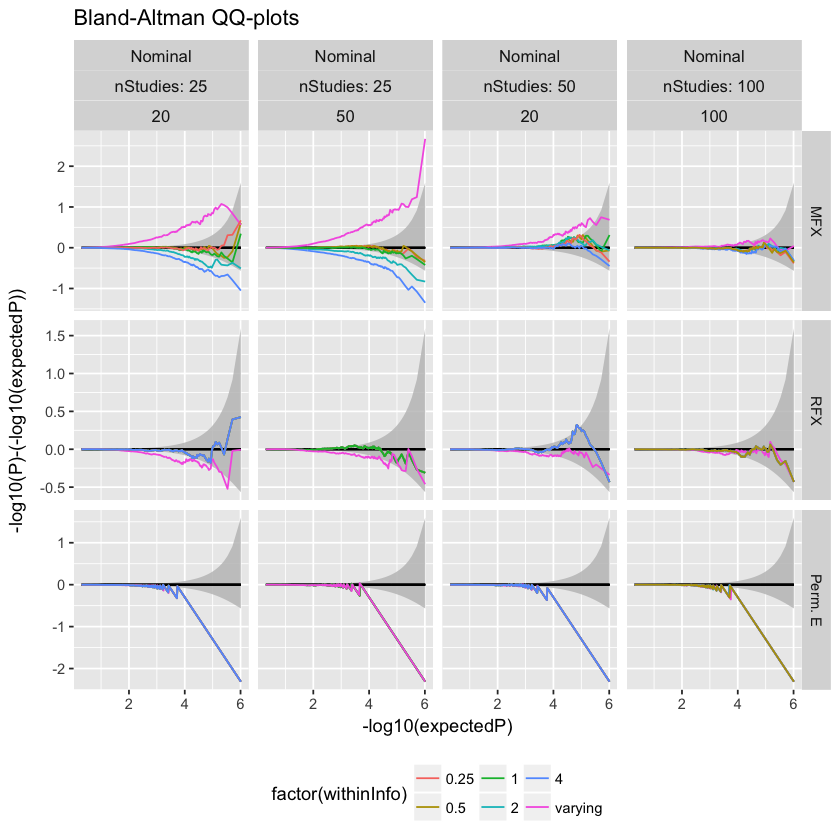

In [17]:
source('plot_lib.R')
source('prepare_data.R')
source('plot_unit_mismatch.R')
source('plot_blandaldman_z.R')
source('plot_grid_methods_color_within.R')
source('plot_qq_p.R')

con_methods <- c("megaMFX","megaRFX","permutCon", "megaFFX_FSL")
con_data_1 <- subset(allsimudat, is.finite(expectedz) & expectedz>0  &  methods %in% con_methods)

best_con_data_1 <- subset(con_data_1, 
    ((methods %in% c("megaMFX") & Between==1) | 
     (methods %in% c("megaRFX") & Between==1)  | 
     (methods %in% c("megaFFX_FSL") & Between==0) |
     (methods %in% c("permutCon"))
    ) & (unitMism=="nominal"))

best_con_data_1_n20 <- subset(best_con_data_1, nSubjects==20)
best_con_data_1_n50 <- subset(best_con_data_1, nSubjects==50)
best_con_data_1_n100_k100 <- subset(best_con_data_1, nSubjects==100)


p <- plot_blandaldman_z(
    list(best_con_data_1), 
    formula=methods~unitMism+nStudies+nSubjects, 
    title="Bland-Altman Z-plots",
    mult=FALSE, 
    lim=NA, max_z=18, filename=NA)
p <- plot_qq_p(
    list(best_con_data_1), 
    formula=methods~unitMism+nStudies+nSubjects, 
    "Bland-Altman QQ-plots", 
    mult=FALSE, 
    lim=NA, max_z=18, filename=NA)

# plot_unit_mismatch(
#     subset(best_con_data_1_n20, ((methods %in% c("megaRFX") & Between==1) | !(methods %in% c("megaRFX")))), 
#     'one-sample test, k=25, n=20', mult=FALSE, single=TRUE, lim=NA, max_z=18)